<a href="https://colab.research.google.com/github/riyabharath24/Cancer-Cell-Detection/blob/main/Cancer_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CANCER CELL DETECTION**

Detection of whether tumour is benign or malignant using a dataset of tumour cell shapes and sizes

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
# Displaying the Dataset using the Pandas Library

df = pd.read_csv('cancer_cell_dataset.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
print("Data types of features are:\n{}".format(df.dtypes))

Data types of features are:
ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


### PREPROCESSING

Converting all non- numerical values to numerical values

In [4]:
df = df[pd.to_numeric(df['BareNuc'], errors="coerce").notnull()]

df['BareNuc'] = df['BareNuc'].astype('int64')
print(df.dtypes)

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object


### EXPLORATORY DATA ANALYSIS

In [5]:
# Displaying the classes using a bar chart

count = df['Class'].value_counts()
count

2    444
4    239
Name: Class, dtype: int64

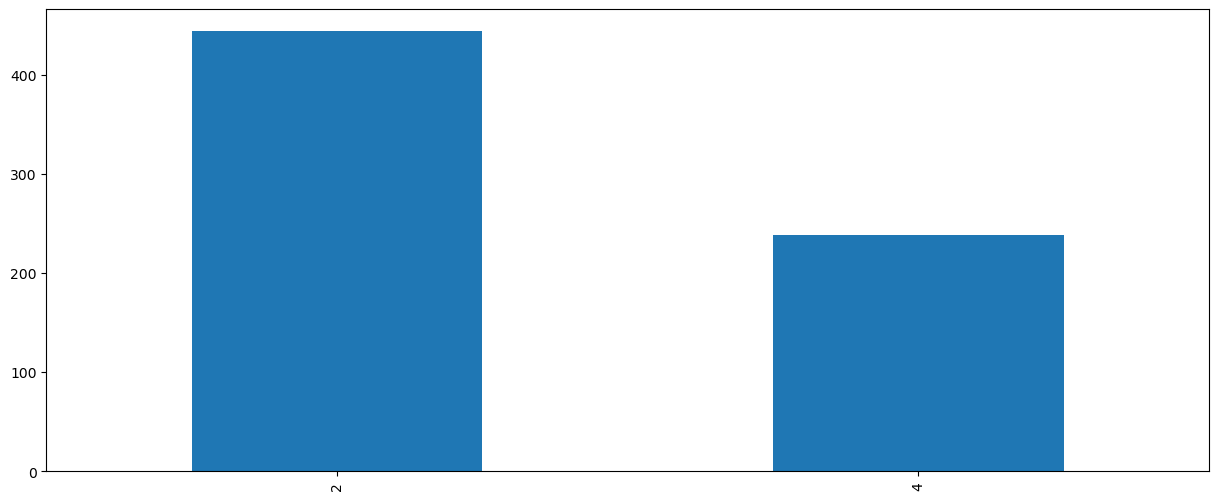

In [6]:
count.plot(kind='bar', figsize=(15,6))
plt.show()

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Clump'}>,
        <Axes: title={'center': 'UnifSize'}>],
       [<Axes: title={'center': 'UnifShape'}>,
        <Axes: title={'center': 'MargAdh'}>,
        <Axes: title={'center': 'SingEpiSize'}>],
       [<Axes: title={'center': 'BareNuc'}>,
        <Axes: title={'center': 'BlandChrom'}>,
        <Axes: title={'center': 'NormNucl'}>],
       [<Axes: title={'center': 'Mit'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

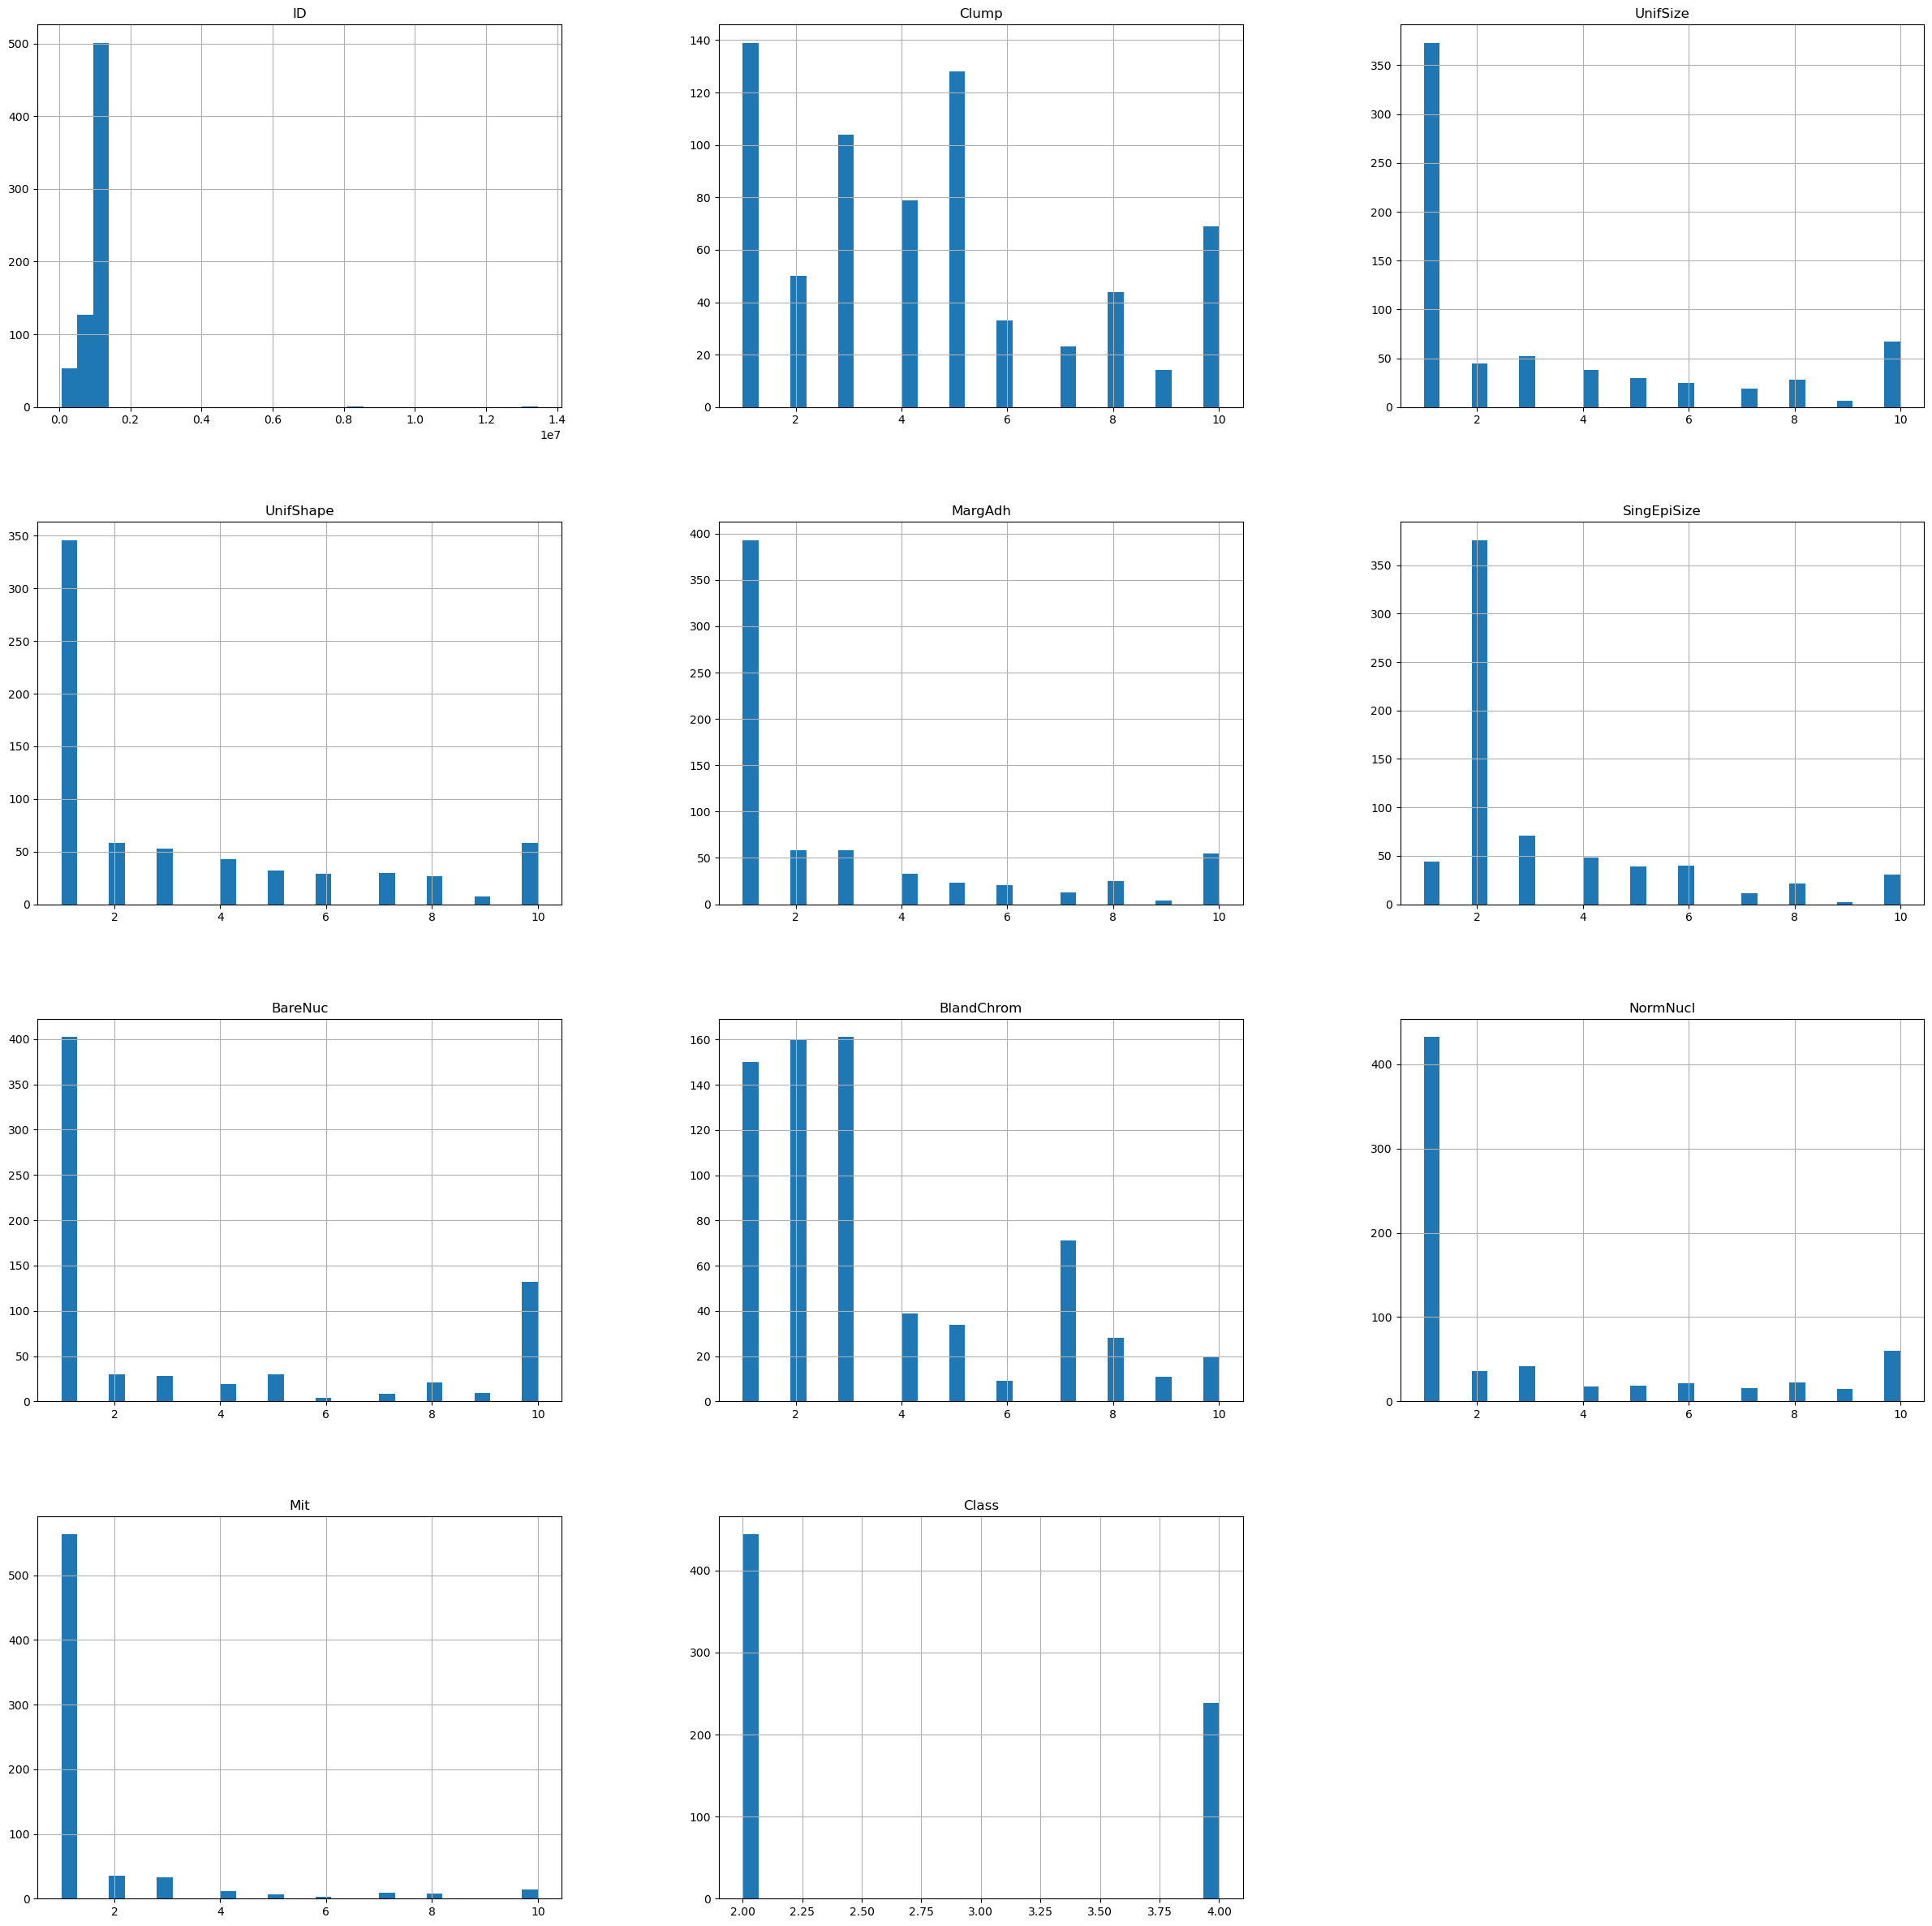

In [7]:
df.hist(bins=30, figsize=(30, 30))

<Axes: >

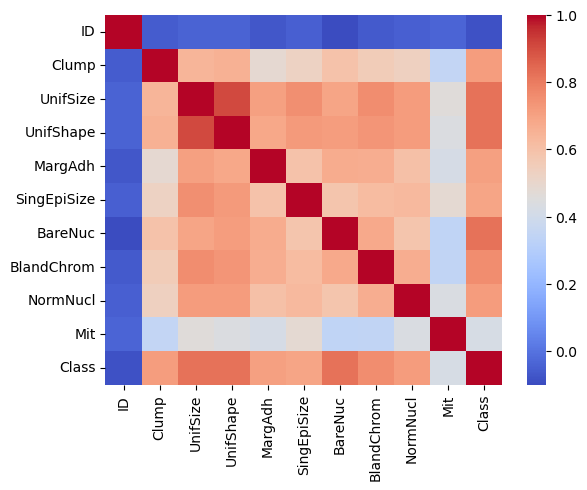

In [8]:
# Correlation Data Heatmap

import seaborn as sns

sns.heatmap(df.corr(),cmap = 'coolwarm',cbar = True)

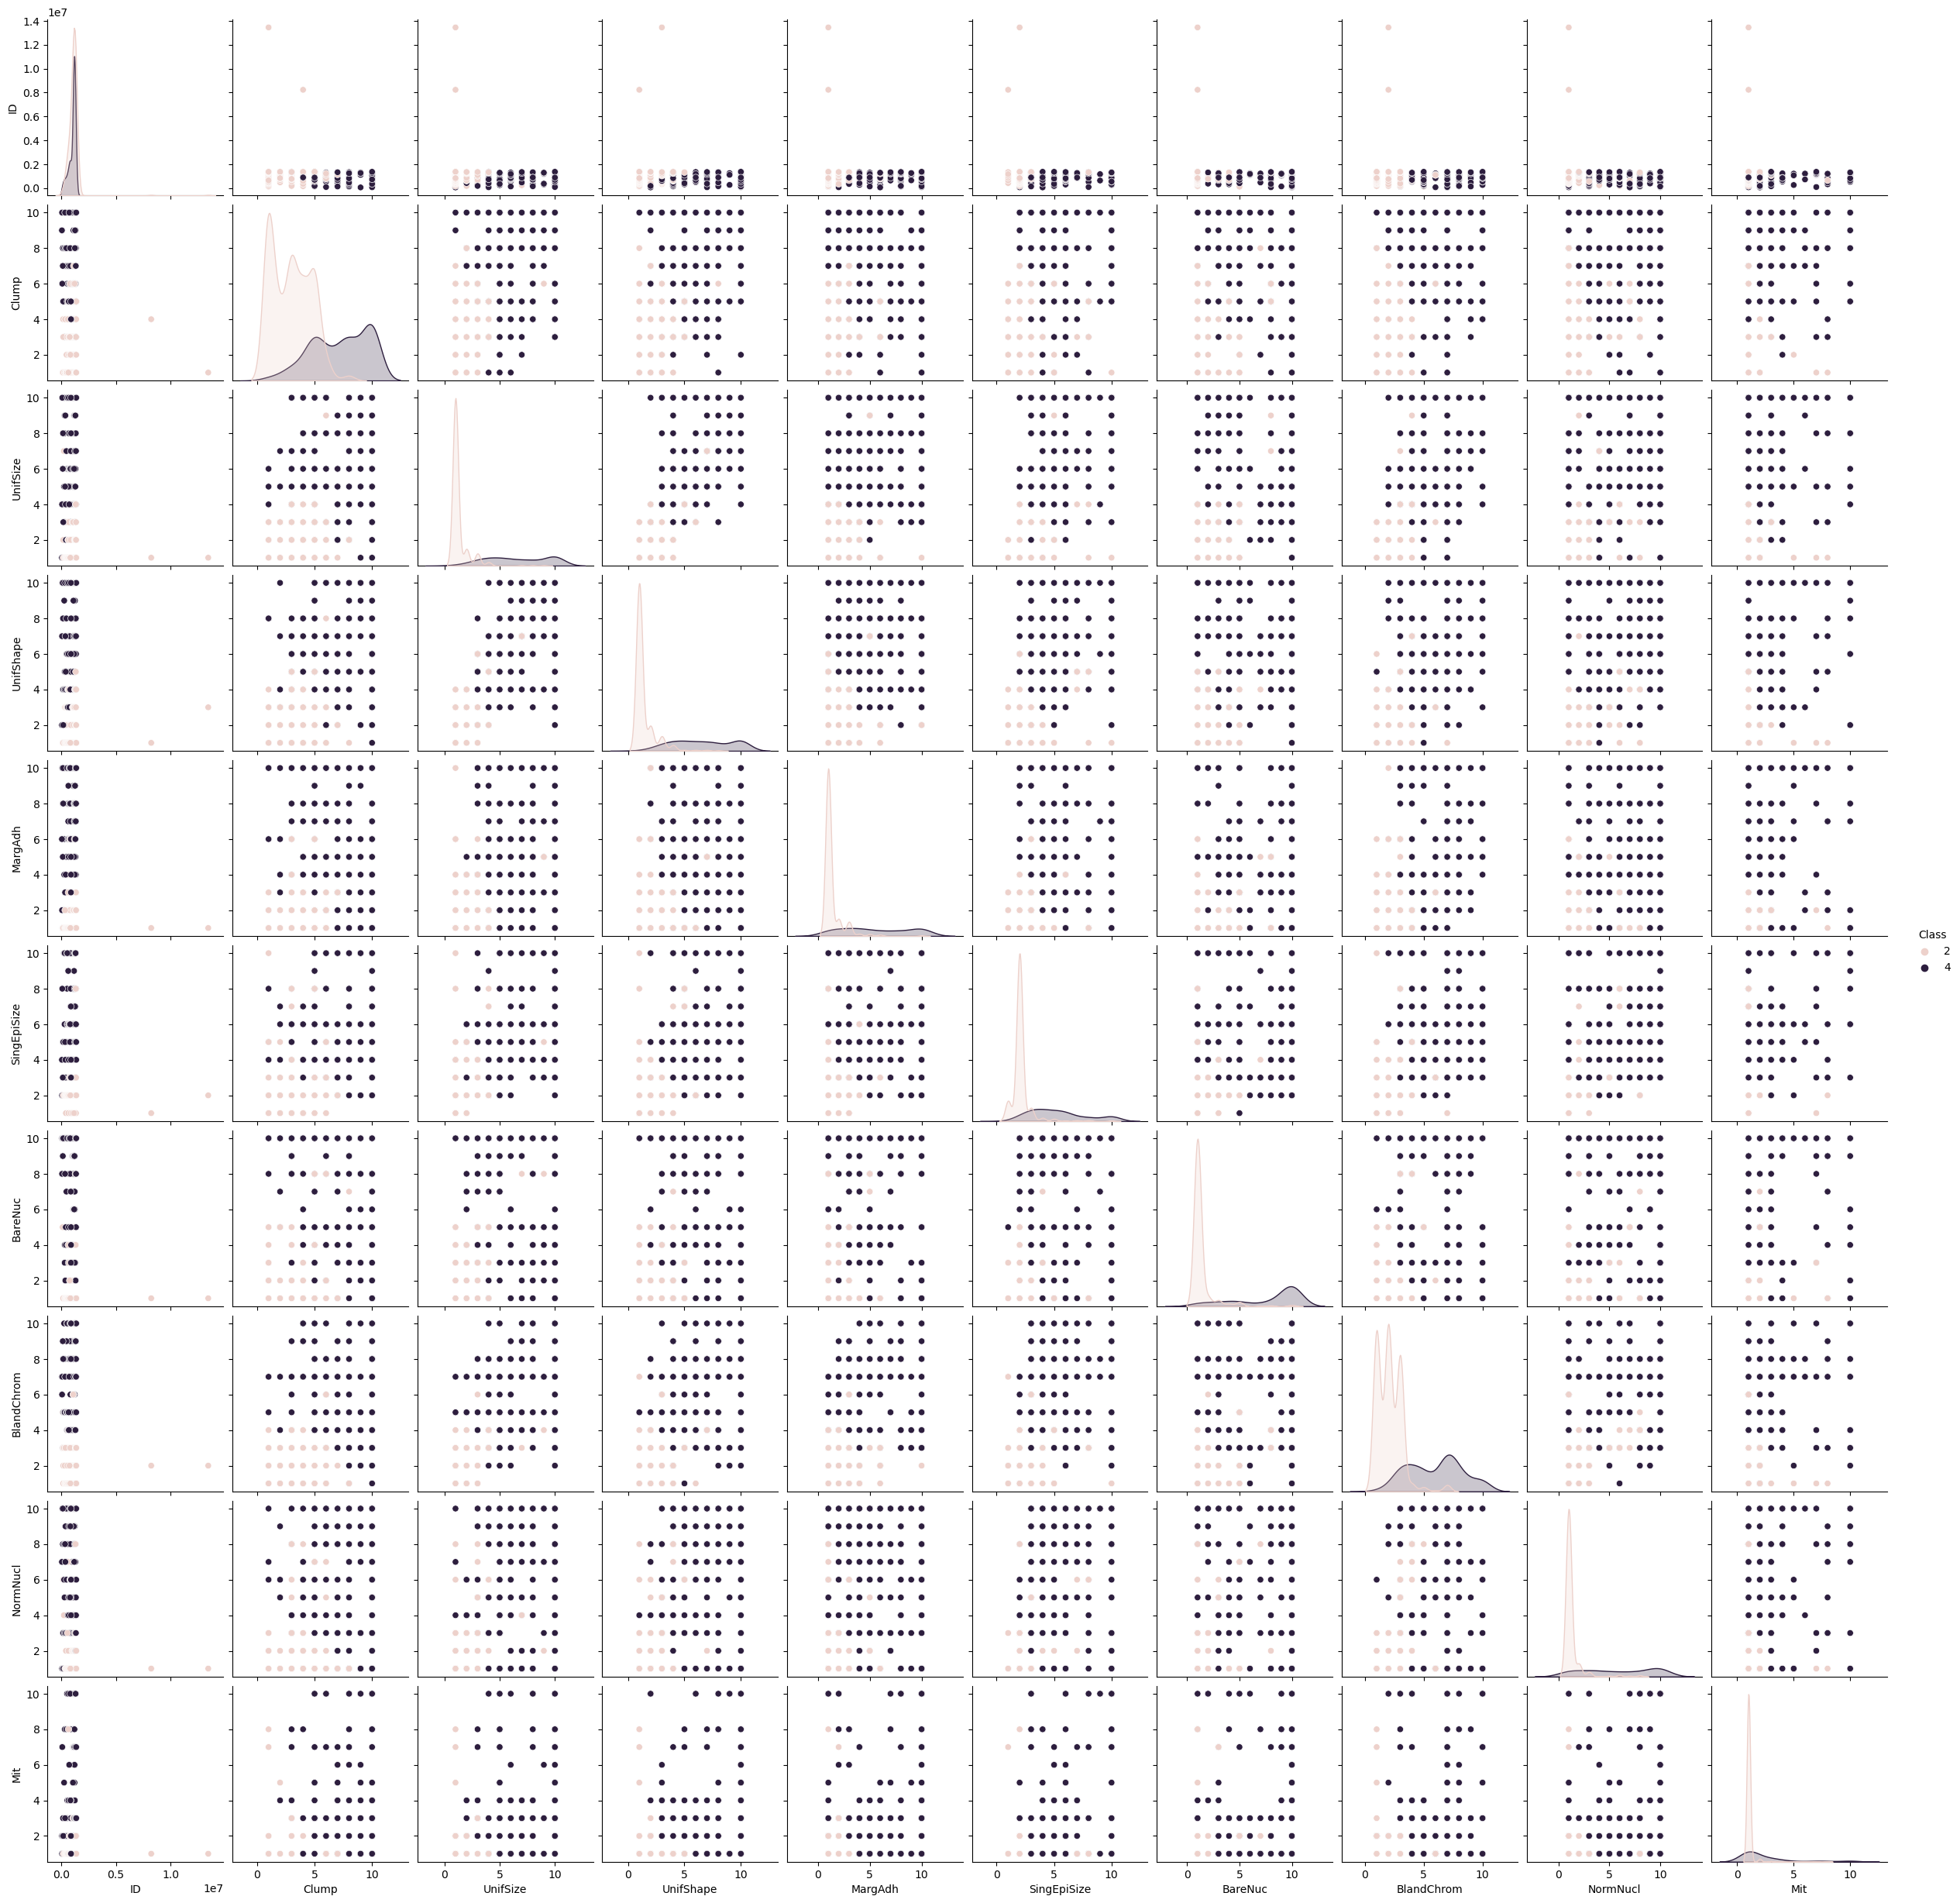

In [9]:
#visualize the whole dataset
sns.pairplot(df, hue="Class")

### SPLITTING DATA INTO TRAINING AND TESTING DATA

In [10]:
# Class Labels include Benign=2 and Malignant=4

X = np.asanyarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
y = np.asanyarray(df['Class'].astype('int'))


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training set: {}\nTest set: {}".format((X_train.shape, y_train.shape), (X_test.shape, y_test.shape)))

Training set: ((546, 9), (546,))
Test set: ((137, 9), (137,))


### CREATING THE MODEL 

In [12]:
#Using Support Vector Machine(SVM) Algorithm

from sklearn.svm import SVC

model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred = model_rbf.predict(X_test)

In [13]:
#displaying the predictions
print("True Labels: {}\nPredicted Labels:{}".format(y_test[3:12], y_pred[3:12]))

True Labels: [2 2 2 4 2 4 4 2 4]
Predicted Labels:[2 2 2 4 2 4 4 2 4]


In [14]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

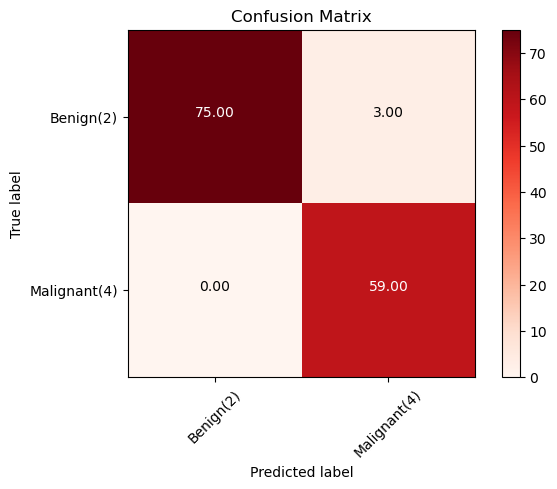

In [15]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=[2,4])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cf_matrix, classes=['Benign(2)', 'Malignant(4)'], title='Confusion Matrix')

In [16]:
print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.9781021897810219


In [17]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        78
           4       0.95      1.00      0.98        59

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



In [18]:
# model training with linear kernel
model_linear = SVC(kernel="linear")

model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.96      0.97      0.97        78
           4       0.97      0.95      0.96        59

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [19]:
# model training with polynomial kernel
model_poly = sklearn.svm.SVC(kernel="poly")

model_poly.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.96      0.97      0.97        78
           4       0.97      0.95      0.96        59

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



### CONCLUSION
The model was trained using the SVM algorithm, with the linear, RBF and polynomial kernels
The RBF function kernel yielded the best results with an accuracy of 95%

In [21]:
import streamlit

ModuleNotFoundError: No module named 'streamlit'

In [22]:
pip install streamlit


  Using cached streamlit-1.22.0-py2.py3-none-any.whl (8.9 MB)
  Using cached protobuf-3.20.3-cp310-cp310-win_amd64.whl (904 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached rich-13.3.5-py3-none-any.whl (238 kB)
  Using cached tzlocal-4.3-py3-none-any.whl (20 kB)
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached validators-0.20.0-py3-none-any.whl
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached pyarrow-12.0.0-cp310-cp310-win_amd64.whl (21.5 MB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached Pygments-2.15.1-py3-none-any.whl (1.1 MB)
  Using cached markdown_it_py-2.2.0-py3-none-any.whl (84 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  U

In [23]:
import streamlit

In [29]:
streamlit hello

SyntaxError: invalid syntax (2773187961.py, line 1)

In [ ]:
!streamlit run cancer_app.py